### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 1: Naive Bayes Leaner for Adult Database


**Student Name(s):** `Tuan Anh Chau`
<br>
**Student ID(s):** `1166394`



Marking will be applied on the four functions that are defined in this notebook, and to your responses to the questions at the end of this notebook.

## General info

<b>Due date</b>: Friday, 8 April 2022 7pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: This iPython notebook is a template which you will use for your Assignment 1 submission. You need to only submitted the completed copy of this iPython notebook.

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count). Submissions more than 5 days late will not be accepted (resul in a mark of 0).
<ul>
    <li>one day late, -1.0;</li>
    <li>two days late, -2.0;</li>
    <li>three days late, -3.0;</li>
    <li>four days late, -4.0;</li>
    <li>five days late, -5.0;</li>
</ul>

<b>Extensions</b>: Students who are demonstrably unable to submit a full solution in time due to medical reasons or other trauma, may apply for an extension.  In these cases, you should email <a href="mailto:ni.ding@unimelb.edu.au">Ni Ding</a> as soon as possible after those circumstances arise. If you attend a GP or other health care service as a result of illness, be sure to provide a Health Professional Report (HPR) form (get it from the Special Consideration section of the Student Portal), you will need this form to be filled out if your illness develops into something that later requires a Special Consideration application to be lodged. You should scan the HPR form and send it with the extension requests.

<b>Marks</b>: This assignment will be marked out of 20, and make up 20% of your overall mark for this subject.

<b>Materials</b>: Use Jupyter Notebook and Python page on Canvas for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Scikit-Learn. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 2 marks for unreadable or exessively inefficient code.

8 of the marks available for this Project will be assigned to whether the four specified Python functions work in a manner consistent with the materials from COMP30027. Any other implementation will not be directly assessed (except insofar as it is required to make these five functions work correctly).

12 of the marks will be assigned to your responses to the questions, in terms of both accuracy and insightfulness. We will be looking for evidence that you have an implementation that allows you to explore the problem, but also that you have thought deeply about the data and the behaviour of the Naive Bayes classifier.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (ED -> Assignments -> A1); we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/124196/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -5.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -3.0
</UL>
**NOTE: COMPLETE AND SUBMIT THIS FILE. YOU SHOULD IMPLEMENT FOUR FUNCTIONS AND INCLUDE YOUR ANSWERS TO THE QUESTIONS IN THIS FILE ONLY. NO OTHER SUBMISSION IS REQUIRED.**

**Keep your code clean. Adding proper comments to your code is MANDATORY.**

## Part 1: Base code [8 marks]

Instructions
1. Do **not** shuffle the data set
2. Treat the attributes as they are(e.g., do **not** convert numeric attributes to categorical or categorical to numeric). Implement a Naive Bayes classifier with appropriate likelihood function for each attribute.
3. You should implement the Naive Bayes classifier from scratch. Do **not** use existing implementations/learning algorithms.
4. You CANNOT have more than one train or predict function. Both continuous numeric attributes and categorical ones should be trained in one `train()` function, similarly for the `predict()`.  
5. Apart from the instructions in point 3, you may use libraries to help you with data reading, representation, maths or evaluation
6. Ensure that all and only required information is printed, as indicated in the final three code cells. Failure to adhere to print the required information will result in **[-1 mark]** per case. *(We don't mind details like you print a list or several numbers -- just make sure the information is displayed so that it's easily accessible)
7. You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find. 
8. You should add adequate comments to make your code easily comprehendible.*

In [4]:
# Import the necessary libraries
import numpy as np
import math 
from collections import defaultdict, Counter
from sklearn.model_selection import train_test_split

In [5]:
def preprocess(filename):
    data = []
    with open(filename, 'r') as f:
        attributes = f.readline().strip().split(',')[:-1]
        for line in f.readlines():
            data.append(list(map(lambda x: x.strip(), line.strip().split(','))))

    train_data, test_data = train_test_split(data, test_size=0.1, shuffle=False)
    return attributes, train_data, test_data

In [6]:
def train(train_data, attributes):
  
    prior_probability = defaultdict(int)
    conditional_probability = defaultdict(dict)
    data_dict = defaultdict(dict)
    attribute_type = {}

    # Categorize the attributes into numerical and nominal by iterating through the dataset
    for i in range(len(attributes)):
        stop = False
        j = 0
        while not stop:
            if train_data[j][i] == '?':
                j += 1
                continue
            try:
                int(train_data[j][i])
                attribute_type[attributes[i]] = 'numeric'
            except ValueError:
                attribute_type[attributes[i]] = 'nominal'

            stop = True
    
    for instance in train_data:
        prior_probability[instance[-1]] += 1
        for i in range(len(instance) - 1):
            # For the nominal attributes, count each value's number of appearance in the dataset and record that value in the
            # values dictionary
            if attribute_type[attributes[i]] == 'nominal':
                if attributes[i] not in data_dict[instance[-1]]:
                    data_dict[instance[-1]][attributes[i]] = defaultdict(int)
                data_dict[instance[-1]][attributes[i]][instance[i]] += 1

            # For the numeric attributes, store the data into an array for later calculation
            else:
                if instance[i] != "?":
                    if attributes[i] not in data_dict[instance[-1]]:
                        data_dict[instance[-1]][attributes[i]] = [float(instance[i])]
                    else:
                        data_dict[instance[-1]][attributes[i]].append(float(instance[i]))
    
    for label in data_dict:
        prior_probability[label] /= len(train_data)
        for attribute in data_dict[label]:
            if attribute_type[attribute] == 'nominal':
                
                # Perform Laplace smoothing with alpha = 1
                for value in data_dict[label][attribute]:
                    data_dict[label][attribute][value] += 1

                # For each nominal attributes we will add in an additional values: unseen. Unseen refers to values that may
                # be present in the testing dataset, but have not been seen before in the training process. 
                data_dict[label][attribute]["unseen"] += 1

                # Smooth the missing values if no missing values have been recorded
                
                # Calculate the conditional probability
                conditional_probability[label][attribute] = {}
                for value in data_dict[label][attribute]:
                    conditional_probability[label][attribute][value] = data_dict[label][attribute][value] / np.sum(list(data_dict[label][attribute].values()))
                
            else:
                conditional_probability[label][attribute] = data_dict[label][attribute]
    
    result = {
        "prior_probability": prior_probability,
        "conditional_probability": conditional_probability,
        "attribute_type": attribute_type
    }

    return result

In [7]:
# This function should predict classes for new items in the testing data

def gaussian_pdf(value, mean, sd):
    return (1/(sd * math.sqrt(2 * math.pi))) * math.exp((-1/2)*math.pow((value - mean)/sd, 2))

def kde(value, data, kernel_bandwidth):
    result = []
    for i in range(len(data)):
        result.append(gaussian_pdf(value - data[i], 0, kernel_bandwidth))
    return np.sum(result) / len(data)

def predict(trained_data, test_data, kernel=None):
    # Kernel bandwidth is used for KDE calculation only

    attributes = list(trained_data["attribute_type"].keys())
    probabilities = []
    classifiers = []
    labels = list(trained_data["conditional_probability"].keys())
    index = 0

    # Calculate the log-probability
    for instance in test_data:
        probabilities.append({})
        for label in labels:
            value = math.log(trained_data["prior_probability"][label])
            for i in range(len(instance) - 1):
                if trained_data["attribute_type"][attributes[i]] == 'numeric':
                    # Ignore missing values
                    if instance[i] != "?":
                        if kernel == None:
                            mean = np.mean(np.array(trained_data["conditional_probability"][label][attributes[i]]))
                            sd = np.std(np.array(trained_data["conditional_probability"][label][attributes[i]]))
                            value += math.log(gaussian_pdf(float(instance[i]), mean, sd))
                        else:
                            value += math.log(kde(float(instance[i]), trained_data["conditional_probability"][label][attributes[i]], kernel))
                else:
                    # Check for unseen values, which includes missing values if the training dataset contains no missing 
                    # values in the corresponding attribute
                    if instance[i] not in trained_data["conditional_probability"][label][attributes[i]]:
                        value += math.log(trained_data["conditional_probability"][label][attributes[i]]["unseen"])
                    else:
                        value += math.log(trained_data["conditional_probability"][label][attributes[i]][instance[i]])

            probabilities[index][label] = value

        # Get the argmax
        local_max = probabilities[index][labels[0]]
        result = labels[0]
        for i in range(1, len(labels)):
            if probabilities[index][labels[i]] > local_max:
                local_max = probabilities[index][labels[i]]
                result = labels[i]
        
        classifiers.append(result)
        index += 1

    return probabilities, classifiers


In [675]:
# This function should evaluate the prediction performance by comparing your model’s class outputs to ground
# truth labels, return and output accuracy, confusion matrix and F1 score.
def evaluate(result, test_data):
    true_positive = true_negative = false_positive = false_negative = 0
    for i in range(len(result)):

        # <=50K will be considered as positive
        if result[i] == test_data[i][-1]:
            if test_data[i][-1] == '<=50K':
                true_positive += 1
            else:
                true_negative += 1
        else:
            if test_data[i][-1] == '<=50K':
                false_negative += 1
            else:
                false_positive += 1

    # Calculate the required metrics
    confusion_matrix = [[true_positive, false_negative], [false_positive, true_negative]]
    accuracy = (true_positive + true_negative) / len(test_data)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f_score = 2 * precision * recall / (precision + recall)
    
    
    return confusion_matrix, accuracy, f_score

In [676]:
# This cell should act as your "main" function where you call the above functions 
# on the full ADULT data set, and print the evaluation score. [0.33 marks]



# First, read in the data and apply your NB model to the OBJECTIVITY data

attributes, train_data, test_data = preprocess("./dataset/adult.csv")
trained_data = train(train_data, attributes)

probabilities, classifiers = predict(trained_data, test_data)

# Second, print the full evaluation results from the evaluate() function

confusion_matrix, accuracy, f_score = evaluate(classifiers, test_data)

print("Accuracy: ", accuracy)
print("F-score: ", f_score)
print("Confusion matrix: ")
print(confusion_matrix[0])
print(confusion_matrix[1])

# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of attributes, L the total number of labels
# The "class probabilities" may be unnormalized
# The "predicted class ID" must be in range (0, L)

N = len(train_data) + len(test_data)
F = len(attributes)
L = len(trained_data["prior_probability"])

print("Attribute vectors of instances [0, 1, 2]: ", [instance[:-1] for instance in train_data[0:3]])

print("\nNumber of instances (N): ", N)
print("Number of attributes (F): ", F)
print("Number of labels (L): ", L)

print("\n\nPredicted class probabilities for instance N-3: ", probabilities[len(test_data) - 3])
print("Predicted class ID for instance N-3: ", classifiers[len(test_data) - 3])
print("\nPredicted class probabilities for instance N-2: ", probabilities[len(test_data) - 2])
print("Predicted class ID for instance N-2: ", classifiers[len(test_data) - 2])
print("\nPredicted class probabilities for instance N-1: ", probabilities[len(test_data) - 1])
print("Predicted class ID for instance N-1: ", classifiers[len(test_data) - 1])

Accuracy:  0.86
F-score:  0.9078947368421053
Confusion matrix: 
[69, 8]
[6, 17]
Attribute vectors of instances [0, 1, 2]:  [['68', '?', '1st-4th', '2', 'Divorced', '?', 'Not-in-family', 'White', 'Female', '20', 'United-States'], ['39', 'State-gov', 'Bachelors', '13', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', '40', 'United-States'], ['50', 'Self-emp-not-inc', 'Bachelors', '13', 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', '13', 'United-States']]

Number of instances (N):  1000
Number of attributes (F):  11
Number of labels (L):  2


Predicted class probabilities for instance N-3:  {'<=50K': -20.77329258815317, '>50K': -19.692202815542075}
Predicted class ID for instance N-3:  >50K

Predicted class probabilities for instance N-2:  {'<=50K': -25.316514518297243, '>50K': -22.736372772266762}
Predicted class ID for instance N-2:  >50K

Predicted class probabilities for instance N-1:  {'<=50K': -16.932306216677457, '>50K': -16.849069171019938}

## Part 2: Conceptual questions [8 marks for groups of 1] / [16 marks for groups of 2]


If you are in a group of 1, you should respond to Q1 and Q2.

If you are in a group of 2, you should respond to Q1, Q2, Q3 and Q4.

A response to a question should take about 100–250 words. You may need to develope codes or functions to help respond to the question here. 

#### NOTE: We strongly recommend <u>including figures or tables, etc.</u> to support your responses. The figures and tables inserted in Markdown cells must be reproducable by your code.

### Q1 [4 marks]
<u>Sensitivity</u> and <u>specificity</u> are two model evaluation metrics.  A good model should have both sensitivity and specificity high. Use the $2 \times 2$ confusion matrix returned by `evaluate()` to calculate the sensitivity and specificity. Do you see a difference between them? If so, what causes this difference? Provide suggestions to improve the model performance. 

In [677]:
# Write additional code here, if necessary (you may insert additional code cells)
def calculate(confusion_matrix):
    sensitivity = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1])
    specificity = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0])
    return sensitivity, specificity

sensitivity, specificity = calculate(confusion_matrix)
print("Model sensitivity: ", sensitivity)
print("Model specificity: ", specificity)

Model sensitivity:  0.8961038961038961
Model specificity:  0.7391304347826086


Provide your text answer of 150-200 words in this cell.

Although the metrics were both relatively high (>0.5), there is a slight difference in the evaluation's sensitivity and specificity: specificity is lower than sensitivity by 0.16. This means that the model is better at identifying the positive cases, i.e adults that have less than 50,000 annual earnings, than identifying the negative ones - those with more than 50,000. This is due to the difference in the number of instances labelled "<=50K" and ">50K". In this dataset, there is only 231 instances that are labelled ">50K", whereas there are 769 with "<=50K" labels, 3 times its counterpart.

Suggestion to improve the performance of the model: 

Create a training dataset with equal part of each labels, by either adding more ">50K" instances or removing "<=50K" instances in the dataset.

In [678]:
def get_label_count(filename):
    with open(filename, 'r') as f:
        labels = [instance.strip().split(',')[-1] for instance in f.readlines()[1:]]
        labels = map(lambda x: x.strip(), labels)
        label_counter = Counter(labels)
        return list(label_counter.most_common())

label_count = get_label_count('dataset/adult.csv')
print(label_count)


[('<=50K', 769), ('>50K', 231)]


### Q2 [4 marks]
You can adopt different methods for training and/or testing, which will produce different results in model evaluation. 

(a) Instead of Gaussian, <u>implement KDE</u> for  $P(X_i|c_j)$ for numeric attributes $X_i$. Compare the evaluation results with Gaussian. Which one do you think is more suitable to model $P(X_i|c_j)$, Gaussian or KDE? Observe all numeric attributes and justify your answer.

You can choose an arbitrary value for kernel bandwidth $\sigma$ for KDE, but a value between 3 and 15 is recommended. You should write code to implement KDE, not call an existing function/method such as `KernelDensity` from `scikit-learn`.

(b) Implement <u>10-fold and 2-fold cross-validations</u>.  
	Observe the evaluation results in each fold and the average accuracy, recall and specificity over all folds. 
	Comment on what is the effect by changing the values of $m$ in $m$-fold cross validation. (You can choose either Gaussian or KDE Naive Bayes.)

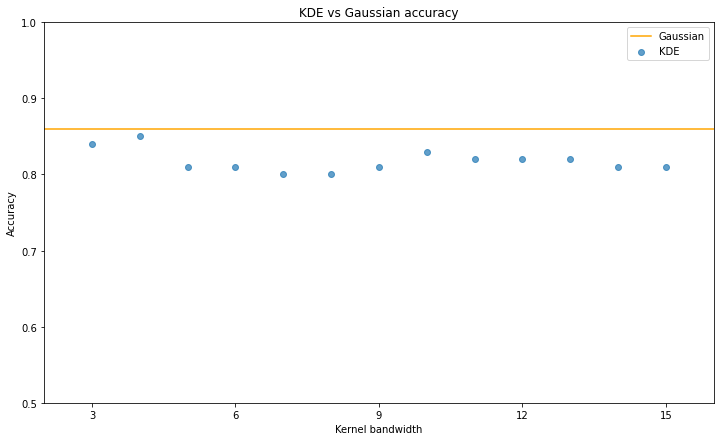

In [679]:
# Write additional code here, if necessary (you may insert additional code cells)
import matplotlib.pyplot as plt

# Test KDE's kernel bandwidth
x = []
y = []
max_accuracy = 0
max_kernel = 0
for i in range(3, 16):
    probabilities, kde_prediction = predict(trained_data, test_data, kernel=i)
    kde_confusion_matrix, kde_accuracy, kde_f_score = evaluate(kde_prediction, test_data)
    if kde_accuracy > max_accuracy:
        max_accuracy = kde_accuracy
        max_kernel = i
    x.append(i)
    y.append(kde_accuracy)

plt.figure(figsize=(12, 7))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("Kernel bandwidth")
plt.ylabel("Accuracy")
plt.xlim(2, 16)
plt.ylim(0.5, 1)
plt.xticks(np.arange(3, 16, 3))
plt.plot([accuracy] * 18, color='orange')
plt.title("KDE vs Gaussian accuracy")
plt.legend(("Gaussian", "KDE"))



(array([164., 213., 269., 304., 167., 122.,  55.,  14.,   7.,   1.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

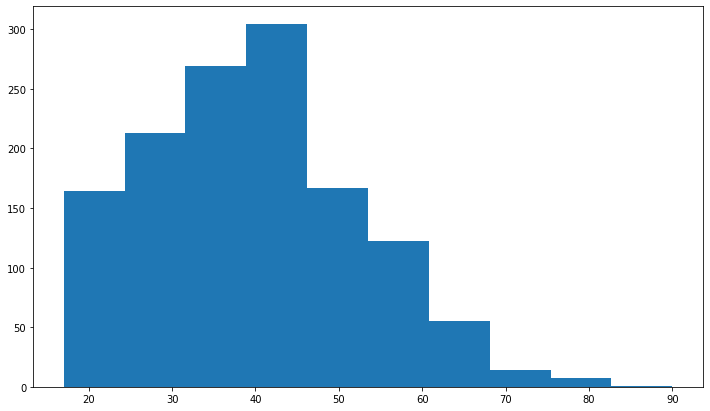

In [668]:
# Age histogram
plt.figure(figsize=(12, 7))
age = trained_data["conditional_probability"]["<=50K"]["age"] + trained_data["conditional_probability"][">50K"]["age"]
plt.hist(age)

(array([  8.,  10.,  28.,  17.,  54., 279., 248.,  31., 202.,  23.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

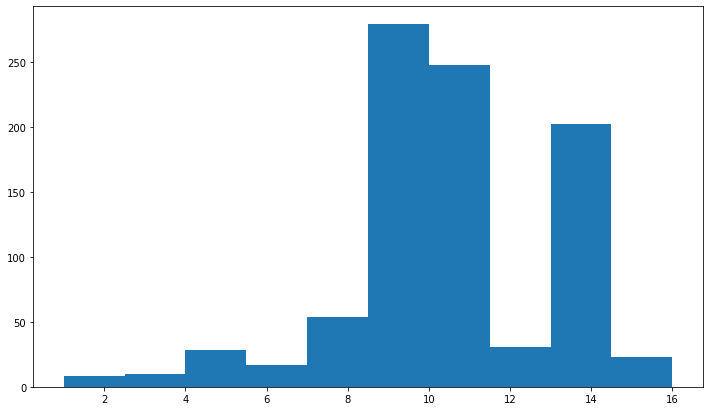

In [667]:
# Education number histogram
plt.figure(figsize=(12, 7))
education = trained_data["conditional_probability"]["<=50K"]["education num"] + trained_data["conditional_probability"][">50K"]["education num"]
plt.hist(education)

(array([ 19.,  68.,  68.,  64., 512., 103.,  50.,  10.,   5.,   1.]),
 array([ 1. , 10.7, 20.4, 30.1, 39.8, 49.5, 59.2, 68.9, 78.6, 88.3, 98. ]),
 <BarContainer object of 10 artists>)

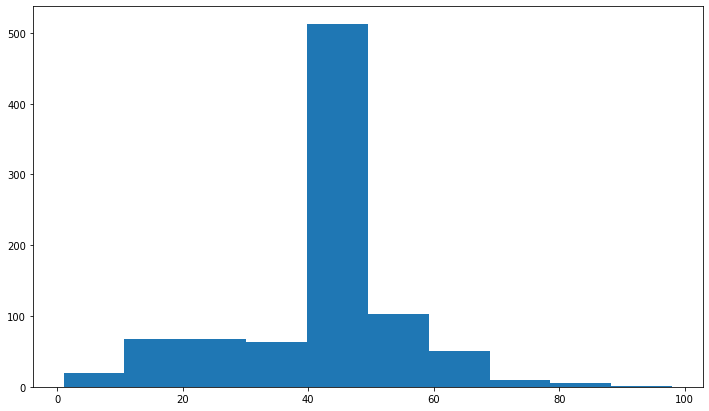

In [669]:
# Hours of work per week histogram
plt.figure(figsize=(12, 7))
hours = trained_data["conditional_probability"]["<=50K"]["hours per week"] + trained_data["conditional_probability"][">50K"]["hours per week"]
plt.hist(hours)

In [682]:
# Evaluation metrics for KDE with kernel bandwidth = 4

probabilities, kde_prediction = predict(trained_data, test_data, kernel=4)
kde_confusion_matrix, kde_accuracy, kde_f_score = evaluate(kde_prediction, test_data)
sensitivity, specificity = calculate(kde_confusion_matrix)
print("Confusion matrix:")
print(kde_confusion_matrix[0])
print(kde_confusion_matrix[1])
print("Accuracy: ", kde_accuracy)
print("F1 score:", kde_f_score)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Confusion matrix:
[67, 10]
[5, 18]
Accuracy:  0.85
F1 score: 0.8993288590604027
Sensitivity: 0.8701298701298701
Specificity: 0.782608695652174


In [680]:
def split(filename, n):
    data = []
    with open(filename, 'r') as f:
        attributes = f.readline().strip().split(',')[:-1]
        for line in f.readlines():
            data.append(list(map(lambda x: x.strip(), line.strip().split(','))))
    splits = []
    for i in range(n):
        start = i * math.ceil(len(data) / n)
        end = (i + 1) * math.ceil(len(data) / n)
        splits.append(data[start:end])
    return splits, attributes


def cross_validation(n):
    print(n, "- fold cross validation:")
    splits, attributes = split("dataset/adult.csv", n)
    accuracies = []
    specificities = []
    recalls = []
    for i in range(n):
        test_data = splits[i]
        train_data = []
        for j in range(n):
            if j != i:
                train_data += splits[j]
                    
        # Train and evaluate the model's performance
        trained_data = train(train_data, attributes)
        probabilities, classifiers = predict(trained_data, test_data)
        confusion_matrix, accuracy, f_score = evaluate(classifiers, test_data)
        sensitivity, specificity = calculate(confusion_matrix)
        accuracies.append(accuracy)
        specificities.append(specificity)
        recalls.append(sensitivity)
        print(f"Fold number {i+1}, accuracy = {accuracy}, specificity = {specificity}, recall = {sensitivity}")

    print("Average accuracy: ", np.average(accuracies))
    print("Average specificity: ", np.average(specificities))
    print("Average recall: ", np.average(recalls))

cross_validation(10)
print("======================================================================================")
cross_validation(2)


10 - fold cross validation:
Fold number 1, accuracy = 0.78, specificity = 0.88, recall = 0.7466666666666667
Fold number 2, accuracy = 0.81, specificity = 0.8636363636363636, recall = 0.7948717948717948
Fold number 3, accuracy = 0.8, specificity = 0.6956521739130435, recall = 0.8311688311688312
Fold number 4, accuracy = 0.86, specificity = 0.782608695652174, recall = 0.8831168831168831
Fold number 5, accuracy = 0.87, specificity = 0.7, recall = 0.9125
Fold number 6, accuracy = 0.82, specificity = 0.7619047619047619, recall = 0.8354430379746836
Fold number 7, accuracy = 0.83, specificity = 0.6956521739130435, recall = 0.8701298701298701
Fold number 8, accuracy = 0.75, specificity = 0.5416666666666666, recall = 0.8157894736842105
Fold number 9, accuracy = 0.8, specificity = 0.6296296296296297, recall = 0.863013698630137
Fold number 10, accuracy = 0.86, specificity = 0.7391304347826086, recall = 0.8961038961038961
Average accuracy:  0.818
Average specificity:  0.7289880900098291
Average re

Provide your text answer of 150-200 words in this cell.

(a) For performance comparison, I chose a kernel bandwidth of 4, as it recorded the highest accuracy for discrete bandwidth between 3 and 15 (as demonstrated by the plot above). We have 3 numerical attributes: age, education num and hours per week.

The KDE model performs slightly worse than Gaussian, with an accuracy of 0.85 and sensitivity of 0.87 comparing to 0.86 and 0.89 respectively. However it does record a marginally higher specificity of 0.78 as oppose to 0.73 of Gaussian.

Based on these results, Gaussian may seem more suitable for predicting the class label for the given adult dataset, but when plotting the numeric data on a histogram, the data do not resembles a normal distribution: age is right skewed, hours per week is clustered around 40 and education num is unevenly spread and slightly left skewed. So Gaussian should not be used when calculating the conditional probability. KDE on the other hand does not assume the distribution of the data, and therefore would be more suitable in predicting the class label for all 3 numerical attributes.

(b) I chose Gaussian evaluation for the n-fold cross validations

There are almost no difference between evaluation metrics of the 10 fold and 2 fold cross-validations: accuracy of 0.818 and 0.819, specificity of 0.729 and 0.72, recall of 0.845 and 0.849 respectively. 

There are more fluctuations in evaluation metrics when the fold size reaches 10 comparing to 2. This can be a result of the difference between training sizes. For 10 folds, the size of the training data is one fifth of that of 2 folds. The distribution of the dataset is more visible for smaller dataset, while for large dataset, uneven distribution in one part may be compensated by uneven distribution from another part, which leads to the larger difference in metrics with 10 folds validations. 

Normally decrease the number of folds would lead to a lower accuracy due to the decrease in training data size and increase in testing data size. However, that is not the case with this model, this can mean that the dataset is distributed evenly and there is no specific cluster of values at any section.

### Q3 [4 marks]
In `train()`, you are asked to treat the missing value of nominal attributes as a new category. There is another option (as suggested in Thu lecture in week 2): <u>ignoring the missing values</u>. 
Compare the two methods in both large and small datasets. Comment and explain your observations.
You can extract the first 50 records to construct a small dataset.Use Gaussian Naive Bayes only for this question.

In [6]:
# Write additional code here, if necessary (you may insert additional code cells)

Provide your text answer of 150-200 words in this cell.

### Q4 [4 marks]
In week 4, we have learned how to obtain information gain (IG) and gain ratio (GR) to choose an attribute to split a node in a decision tree. We will see how to apply them in the Naive Bayes classification.

(a) Compute the GR of each attribute $X_i$, relative to the class distribution. In the Na\"ive Bayes classifier, remove attributes in the ascending order of GR: first, remove $P(X_i|c_j)$ such that $X_i$ has the least GR; second, remove $P(X_{i'}|c_j)$ such that $X_{i'}$ has the second least GR,......, until there is only one $X_{i*}$ with the largest GR remaining in the maximand $P(c_j) P(X_{i^*} | c_j)$. Observe the <u>change of the accuracy for both Gaussian and KDE</u> (Choose bandwidth $\sigma=10$ for KDE).

(b) Compute the IG between each pair of attributes. Describe and explain your observations. Choose an attribute and implement an estimator to predict the value of `education num`. Explain why you choose this attribute. Enumerate two other examples that an attribute can be used to estimate the other and explain the reason.  

In [ ]:
# Write additional code here, if necessary (you may insert additional code cells)

### (a)

Provide your text answer to **Question 4.a** of 100-150 words in this cell.

### (b)

Provide your text answer to **Question 4.b** of 150-200 words in this cell.

<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: Tuan Anh Chau - 1166394
   
   <b>Dated</b>: 31/3/2022